# Monte Carlo Approximation

## Requirement 1
Apply the monte carlo approximation to get the integral of f(x) over the interval [1, 4]  
Repeat your experiment] using the sample sizes n [100,200, …
10000]

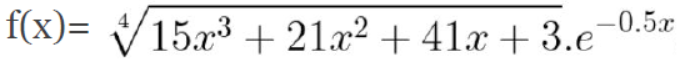

First, we will do some imports

In [1]:
import math
import random

We will define our function using lambdas

In [2]:
fx = lambda x : (15 * (x**3) + 21 * (x**2) + 41 * (x) + 3)**(1/4) * pow(math.e, -0.5 * x)

We could have also defined it as a normal function like this

We need to plot our function. So we will import some required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Now, we will generate an array of 100 equally-spaced values between 0 and 10

In [4]:
x = np.linspace(0,10,100)

Now, we evaluate and plot our function

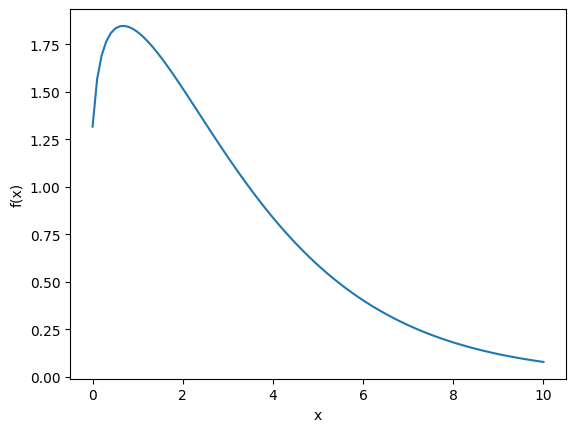

In [5]:
y = fx(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Now, we define the interval and the sample sizes.

In [6]:
a = 1
b = 4
Sample_Sizes = np.arange(100,10001,100)
Results = []

Sample_Sizes is a numpy array to store the sample sizes. We set the STOP parameter to 10001 since the arange function is exclusive.

We created the N_Random_Samples array which contains N random-sampled values (Sampled with a unifrom distribution) between a and b

In [7]:
for N in Sample_Sizes:
    Result = 0
    N_Random_Samples = [random.uniform(a, b) for _ in range(N)]
    for i in (N_Random_Samples):
        Result += fx(i)
    Result = (1/N) * (b - a) * Result # This is the mean value of the integral/area under the curve
    Results.append(Result)
Results = np.array(Results)

Then we loop on our sample to calculate the value of the Monte Carlo approxiamtion of that integral.  
At the end we append the result to our Results array. Optionally, and for the sake of uniformity and easy reusability, I changed
the Results array to a numpy array instead of a normal python array. This couldn't be done from the start since we couldn't have
appended values to a numpy array, as easily at least.

Now, we calculate the exact value[1] of the integral using the scipy library, and we store that value.

In [8]:
import scipy
Result2 = scipy.integrate.quad(fx,a,b)
Result2 = Result2[0]
print("Exact Result = %f" % Result2)

Exact Result = 4.005888


We did Result2 = Result2[0] since the integrate.quad() function returns an array of two values, where the first one
is our sought after result and the second one is the error margin in calculation.  

It is important to note that the value calculated by this scipy-function itself is not exact. Still it would be extremely close and probably is better than the ones we obtain using the Monte Carlo Approximation. And hence, we take it to be the exact accurate result.

Now, to get the best sample size, we see which sample size gives the least error relative to the exact result

In [9]:
eps = 1000000
for i in range (Results.size):
    if(abs(Results[i] - Result2) < eps):
        eps = abs(Results[i] - Result2)
        best_N = Sample_Sizes[i]
        best_Value = Results[i]
best_error = (abs(best_Value - Result2)/Result2) * 100

In [10]:
print("The best obtained value is %f occuring at N = %d\n"
      "It has the lowest error margin of %f%%" % (best_Value, best_N,best_error))

The best obtained value is 4.005902 occuring at N = 6700
It has the lowest error margin of 0.000350%


Now, plotting the results

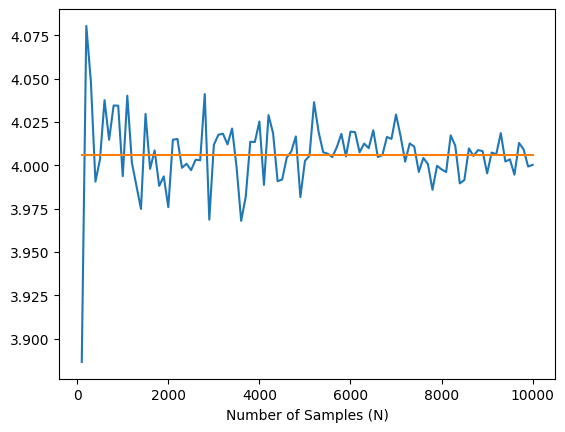

In [11]:
plt.plot(Sample_Sizes, Results)
plt.plot(Sample_Sizes, np.full(Sample_Sizes.shape, Result2))
plt.xlabel("Number of Samples (N)")
plt.show()

## Requirement 2

We set our variables

In [12]:
N = 1000
iterations = 500
Results = []

For 500 iterations, we will calculate Monte Carlo approximation for a sample of size 1000

In [13]:
for i in range (iterations):
    Random_Sample = [random.uniform(a, b) for _ in range(N)]
    for j in (Random_Sample):
        Result += fx(j)
    Result = (1/N) * (b - a) * Result
    Results.append(Result)
Results = np.array(Results)

Now, we plot the results and calculate the standard deviation and the mean

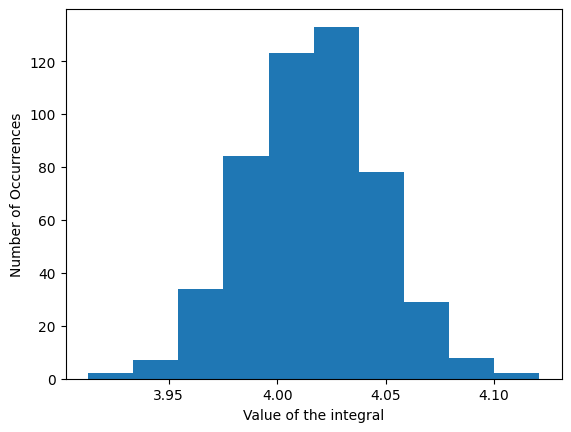

In [14]:
plt.hist(Results)
plt.xlabel("Value of the integral")
plt.ylabel("Number of Occurrences")
plt.show()

The results graph follows a Normal/Gaussian distribution, as expected.

In [15]:
standard_deviation = np.std(Results)
print("Standard Deviation = %f" % standard_deviation)
Mean = np.mean(Results)
print("Mean = %f" % (Mean))

Standard Deviation = 0.029846
Mean = 4.016095


### Important Insights

If we increase the number of iterations we get a better Normal Distribution.  

If we increase the sample Size, N, we get a better approximation for the mean.  

To illustrate, if We have N = infinity, then we are certain of the value of the integral; it's exact; Mean = EXACT_VALUE.  
where Mean, refers to the value calculated from the Monte Carlo Approximation.  

Also, whatever the number of iterations we do, the mean of the means will equal Mean, as we will be obtaining it in every iteration.  
Mathematically expressed as: mean of the means = (iterations * Mean)/iterations = Mean  

So: the mean of the means = Mean = EXACT_VALUE. Hence there's no variance and the std_dev = 0  